# Homework 1: Causality and Expressions

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests.

In [3]:
# Don't change this cell; just run it. 
# from client.api.notebook import Notebook
# ok = Notebook('hw01.ok')
# _ = ok.auth(inline=True)

Reading:
- Textbook chapters [1](http://www.inferentialthinking.com/chapters/01/what-is-data-science.html), [2](http://www.inferentialthinking.com/chapters/02/causality-and-experiments.html), and [3](http://www.inferentialthinking.com/chapters/03/programming-in-python.html)

Deadline:

This assignment is due Thursday, January 26 at 6PM. You will receive an early submission bonus point if you turn in your final submission by Wednesday, January 25 at 6PM. Late work will not be accepted unless you have made special arrangements with your (U)GSI or the instructor.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck. Drop-in office hours will be held Monday-Thursday. The schedule appears on [data8.org/sp17/office-hours.html](http://data8.org/sp17/office-hours.html) and will be updated over the weekend.

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [4]:
# _ = ok.submit()

## 1. Scary Arithmetic


An ad for ADT Security Systems says,

> "When you go on vacation, burglars go to work [...] According to FBI statistics, over 25% of home burglaries occur between Memorial Day and Labor Day."

Do the data in the ad support the claim that burglars are more likely to go to work during the time between Memorial Day and Labor Day than at other times? Please explain your answer.

*Write your answer here, replacing this text.*

## 2. Characters in Little Women


In lecture, we counted the number of times that the literary characters were named in each chapter of the classic book, [Little Women](data8.org/data8assets/lec/little_women.txt). In computer science, the word "character" also refers to a letter, digit, space, or punctuation mark; any single element of a text. The following code generates a scatter plot in which each dot corresponds to a chapter of Little Women. The horizontal position of a dot measures the number of periods in the chapter. The vertical position measures the total number of characters.

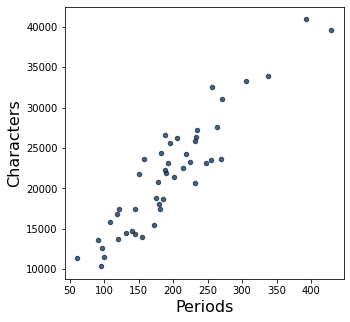

In [8]:
# This cell contains code that hasn't yet been covered in the course,
# but you should be able to interpret the scatter plot it generates.

from datascience import *
from urllib.request import urlopen
import numpy as np
%matplotlib inline

little_women_path = 'little_women.txt'
with open(little_women_path, 'r') as f:
    chapters = f.read().split('CHAPTER ')[1:]
text = Table().with_column('Chapters', chapters)
characters_and_periods = Table().with_columns(
    'Periods',    np.char.count(chapters, '.'),
    'Characters', text.apply(len, 0)
    )
characters_and_periods.scatter(0)

**Question 1.** How many periods are in the chapter with the most characters? Assign either 1, 2, 3, 4, or 5 to the name `characters_q1` below.

1. 250
2. 392
3. 440
4. 32,000
5. 40,000

In [14]:
characters_q1 = 2

In [15]:
characters_and_periods.sort('Characters', descending=True).select('Periods').take(0)

Periods
392


**Question 2.** About how many periods are in the chapter with the most characters per period? Assign either 1, 2, 3, 4, or 5 to the name `characters_q2` below.

1. 61
2. 80
3. 175
4. 250
5. 350

In [17]:
characters_q2 = 1

In [18]:
characters_per_period = characters_and_periods.with_columns('Characters/Period', characters_and_periods.column('Characters') / characters_and_periods.column('Periods'))

characters_per_period.sort('Characters/Period', descending=True).select('Periods').take(0)

Periods
61


Check that your answers are in the correct format. This test *does not* check that you answered correctly; only that you assigned a number successfully in each multiple-choice answer cell.

In [19]:
# _ = ok.grade('q2')

To discover more interesting facts from this plot, read [Section 1.3.2](https://www.inferentialthinking.com/chapters/01/3/2/another-kind-of-character.html) of the textbook.

## 3. Names and Assignment Statements


**Question 1.** When you run the following cell, Python produces a cryptic error message.

In [20]:
4 = 2 + 2

SyntaxError: cannot assign to literal (2912417615.py, line 1)

Choose the best explanation of what's wrong with the code, and then assign 1, 2, 3, or 4 to `names_q1` below to indicate your answer.

1. Python is smart and already knows `4 = 2 + 2`.

2. `4` is a number, and it doesn't make sense to make a number be a name for something else. In Python, "`x = 2 + 2`" means "assign `x` as the name for the value of `2 + 2`."

3. It should be `2 + 2 = 4`.

4. I don't get an error message. This is a trick question.

In [21]:
names_q1 = 2

**Question 2.** When you run the following cell, Python will produce another cryptic error message.

In [22]:
two = 3
six = two plus two

SyntaxError: invalid syntax (3853341378.py, line 2)

Choose the best explanation of what's wrong with the code and assign 1, 2, 3, or 4 to `names_q2` below to indicate your answer.

1. The `plus` operation only applies to numbers, not the word "two".

2. The name "two" cannot be assigned to the number 3.

3. Two plus two is four, not six.

4. The name `two` cannot be followed directly by another name.

In [23]:
names_q2 = 4

Check that your answers are in the correct format. This test *does not* check that you answered correctly; only that you assigned a number successfully in each multiple-choice answer cell.

In [24]:
#_ = ok.grade('q3')

## 4. Job Opportunities & Education in Rural India


A [study](http://www.nber.org/papers/w16021.pdf) at UCLA investigated factors that might result in greater attention to the health and education of girls in rural India. One such factor is information about job opportunities for women. The idea is that if people know that educated women can get good jobs, they might take more care of the health and education of girls in their families, as an investment in the girls’ future potential as earners.

The study focused on 160 villages outside the capital of India, all with little access to information about call centers and similar organizations that offer job opportunities to women. In 80 of the villages chosen at random, recruiters visited the village, described the opportunities, recruited women who had some English language proficiency and experience with computers, and provided ongoing support free of charge for three years. In the other 80 villages, no recruiters visited and no other intervention was made.

At the end of the study period, the researchers recorded data about the school attendance and health of the children in the villages.

**Question 1.** Which statement best describes the *treatment* and *control* groups for this study? Assign either 1, 2, or 3 to the name `jobs_q1` below.

1. The treatment group was the 80 villages visited by recruiters, and the control group was the other 80 villages with no intervention.

2. The treatment group was the 160 villages selected, and the control group was the rest of the villages outside the capital of India.

3. There is no clear notion of *treatment* and *control* group in this study.

In [25]:
jobs_q1 = 1

**Question 2.** Was this an observational study or a randomized controlled experiment? Assign either 1, 2, or 3 to the name `jobs_q2` below.

1. This was an observational study.

2. This was a randomized controlled experiment.  

3. This was a randomized observational study.

In [26]:
jobs_q2 = 2

**Question 3.** The study reported, “Girls aged 5-15 in villages that received the recruiting services were 3 to 5 percentage points more likely to be in school and experienced an increase in Body Mass Index, reflecting greater nutrition and/or medical care. However, there was no net gain in height. For boys, there was no change in any of these measures.” Why do you think the author points out the lack of change in the boys?

*Write your answer here, replacing this text.*

Check that your answers are in the correct format. This test *does not* check that you answered correctly; only that you assigned a number successfully in each multiple-choice answer cell.

In [27]:
#_ = ok.grade('q4')

## 5. Differences between Universities


**Question 1.** Suppose you'd like to *quantify* how *dissimilar* two universities are, using three quantitative characteristics.  The US Department of Education data on [UW](https://collegescorecard.ed.gov/school/?236948-University-of-Washington-Seattle-Campus) and [Cal](https://collegescorecard.ed.gov/school/?110635-University-of-California-Berkeley) describes the following three traits (among many others):

| Trait                                | UW     | Cal    |
|--------------------------------------|--------|--------|
| Average annual cost to attend ($)    | 13,566 | 13,707 |
| Graduation rate (percentage)         | 83     | 91     |
| Socioeconomic Diversity (percentage) | 25     | 31     |

You decide to define the dissimilarity between two universities as the maximum of the absolute values of the 3 differences in their respective trait values.

Using this method, compute the dissimilarity between UW and CAL.  Name the result `dissimilarity`.  Use a single expression (a single line of code) to compute the answer.  Let Python perform all the arithmetic (like subtracting 91 from 83) rather than simplifying the expression yourself. The built-in `abs` function takes absolute values.

In [ ]:
dissimilarity = ...
dissimilarity

Check your work by running the cell below.

In [ ]:
# _ = ok.grade('q5_1')

**Question 2.** The national average annual cost of college is $16,126.50. If the average annual cost of UW and Cal were measured as a percentage of the national average rather than a dollar amount, what would be the dissimilarity between these two universities? Assign either 1, 2, or 3 to the name `universities_q2` below.

1. 1
2. 8
3. 141

In [ ]:
universities_q2 = ...

Check that your answer is in the correct format. This test *does not* check that you answered correctly; only that you assigned a number successfully to `universities_q2`.

In [ ]:
# _ = ok.grade('q5_2')

## 6. More Children Living at Home?


A USA Today [article](http://usatoday30.usatoday.com/news/nation/2006-03-16-failure_x.htm) from 2006 includes this sentence: “Since 1970, the percentage of people ages 18 to 34 [in the United States] who live at home with their family increased 48%, from 12.5 million to 18.6 million, the Census Bureau says.”

**Question 1.** The word “percentage” isn’t used correctly in the context of the rest of the sentence. What word should replace it?

*Write your answer here, replacing this text.*

**Question 2.** In at most 3 sentences, describe whether [changes in the US population](https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&met_y=population&idim=country:US&hl=en&dl=en) are relevant to the data in the USA Today article.

*Write your answer here, replacing this text.*

## 7. Welcome Survey


Once you have submitted, please also complete the welcome survey in order to receive credit for homework 1.

Welcome survey is here: https://goo.gl/forms/9cP1hFgBoYT1xKIu2